In [1]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol)

file read
strings converted to numbers
q-values estimated
ranks computed


Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/10 done!
Training in iteration 3 with split 1/3 starts!
Training in iteration 3 with split 2/3 starts!
Training in iteration 3 with split 3/3 starts!
Iteration 3/10 done!
Training in iteration 4 with split 1/3 starts!
Training in iteration 4 with split 2/3 starts!
Training in iteration 4 with split 3/3 starts!
Iteration 4/10 done!
Training in iteration 5 with split 1/3 starts!
Training in iteration 5 with split 2/3 starts!
Training in iteration 5 with split 3/3 starts!
Results are not getting better. Terminating and using Iteration 2 with an auc of 236.74.


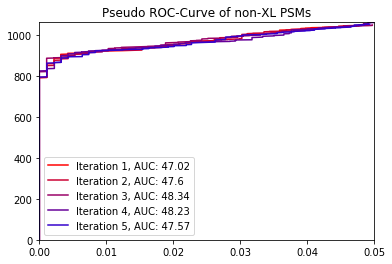

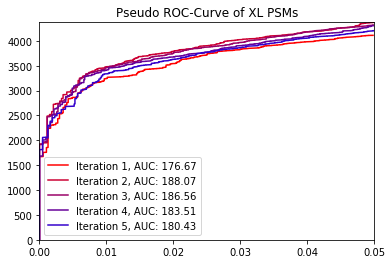

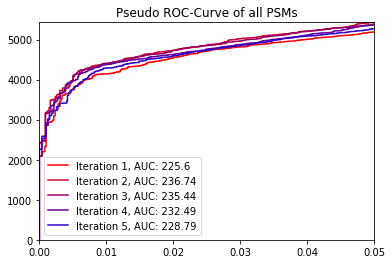

In [2]:
p = percolator(dSlow, idCol, excluded, plotEveryIter = True, plotSaveName = '../results/percolator_acv_rankTest_{}.png', rankOption = True)

236.73551820401

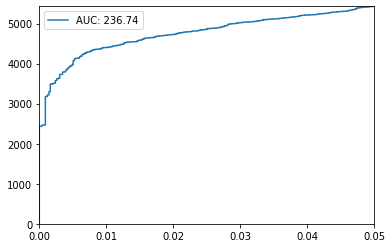

In [3]:
pseudoROC(p)

[47.598676212837, 188.0715255396327]

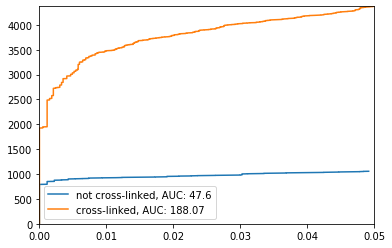

In [4]:
evalXL(p)

[48.105051743546106, 166.24870094745975]

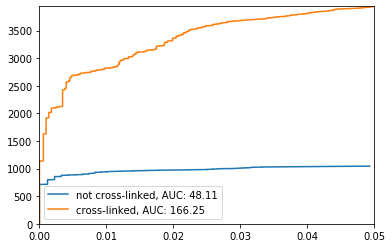

In [5]:
evalXL(dSlow)